<a href="https://colab.research.google.com/github/Th-Three/datascience_projects/blob/main/python%20project/Store%20Item%20Demand%20Forecasting%3A%20Time%20Series%20Analysis/%5BThanaphop%5DTime_series_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Time series analysis

**Date:** 24 September 2024\
**Author:** Thanaphop Threethipthikoon\
**Objective:** To predict 3 months of item-level sales data at different store locations.\
**Dataset source at**: https://www.kaggle.com/c/demand-forecasting-kernels-only/data


# Exploratory Data Analysis

1. Check the dataset
    - Find the size
    - Check if there is any missing value

2. Data Analysis part
    - See the distribution of data
    - Find Yearly and Monthly sales
    - Find total sales by store and by item
    - Find the pattern in data for trends and seasonal factors

In [ ]:
#Import the essential library first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.head())
print(df_train.shape) #it should be (91300,4)
print(df_test.head())
print(df_test.shape) #it should be (45000, 4)


         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10
(913000, 4)
   id        date  store  item
0   0  2018-01-01      1     1
1   1  2018-01-02      1     1
2   2  2018-01-03      1     1
3   3  2018-01-04      1     1
4   4  2018-01-05      1     1
(45000, 4)


In [ ]:
#check null value from df_train
df_train.isnull().sum() #shoulb contain 0 na

,0
date,0
store,0
item,0
sales,0


The dataset train.csv has 913k rows and 4 columns

The dataset test.csv has 45k rows and 4 columns

All dataset has no null/missing value.

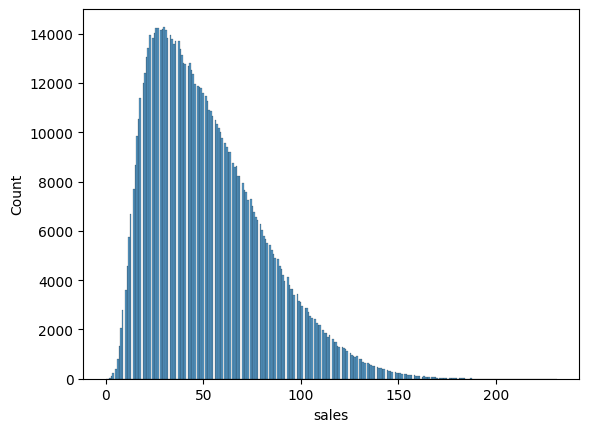

The median sales is 47.0
The mean sales is 52.25
The min sales is 0
The max sales is 231


In [ ]:
#create a histogram of sales distribution data
sns.histplot(df_train['sales'])
plt.show()

#print the median of sales
print(f"The median sales is {df_train['sales'].median()}")

#print the mean of sales in 2 decimal point
print(f"The mean sales is {df_train['sales'].mean():.2f}")

#print the min and max of sales
print(f"The min sales is {df_train['sales'].min()}")
print(f"The max sales is {df_train['sales'].max()}")

The distribution of sales is left-skewed and all has range from 0 to 231.

The median is at 47

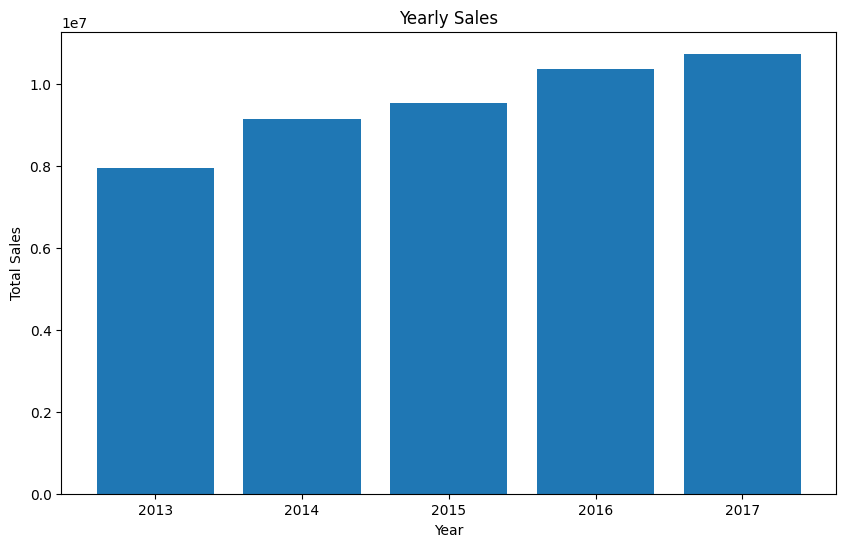

In [ ]:
# prompt: create a bar plot of yearly sales

# Convert 'date' column to datetime objects
df_train['date'] = pd.to_datetime(df_train['date'])

# Extract year from the date
df_train['year'] = df_train['date'].dt.year

# Group by year and calculate total sales for each year
yearly_sales = df_train.groupby('year')['sales'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_sales.index, yearly_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales')
plt.show()


The total sales increases over the year.

<ipython-input-120-27b1730b0a44>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['month'] = df_2017['date'].dt.month


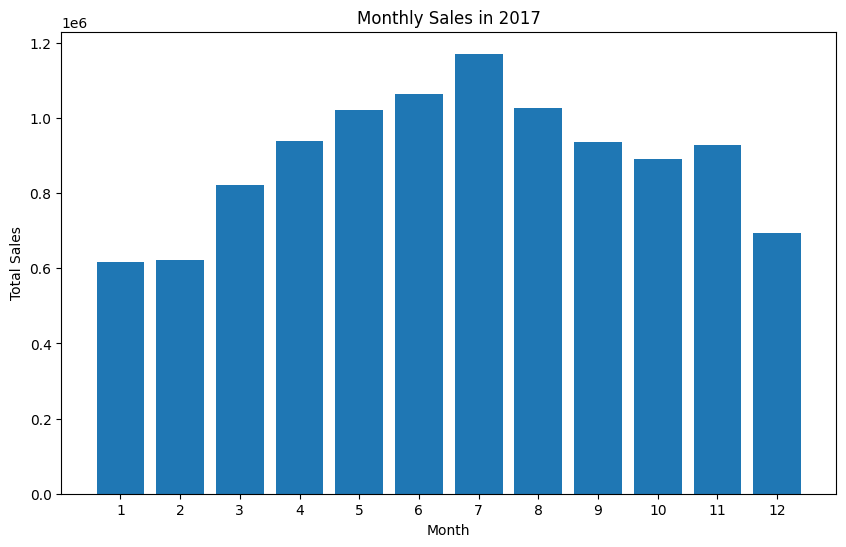

In [ ]:
# create a bar plot showing the monthly sales in 2017

# Filter data for the year 2017
df_2017 = df_train[df_train['year'] == 2017]

# Extract month from the date
df_2017['month'] = df_2017['date'].dt.month

# Group by month and calculate total sales for each month
monthly_sales_2017 = df_2017.groupby('month')['sales'].sum()

# Sort monthly sales in ascending order
monthly_sales_2017_sorted = monthly_sales_2017.sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales_2017_sorted.index, monthly_sales_2017_sorted.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
#x tick mark for every month
plt.xticks(range(1, 13))
plt.title('Monthly Sales in 2017')
plt.show()


The sales is highest in July with the data from the year 2017

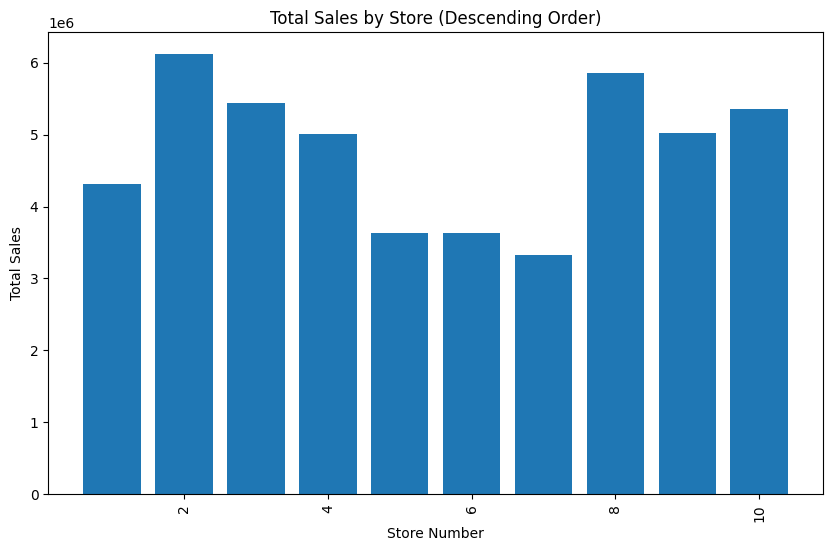

,sales
store,
2,6120128
8,5856169
3,5435144
10,5360158
9,5025976


In [ ]:
# Create a bar chart to find the highest sales count store

# Group by store_nbr and calculate total sales for each store
store_sales = df_train.groupby('store')['sales'].sum()

# Sort store sales in descending order
store_sales_sorted = store_sales.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(store_sales_sorted.index, store_sales_sorted.values)
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store (Descending Order)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

store_sales_sorted.head(5)

The store no. 2 has the highest sales.

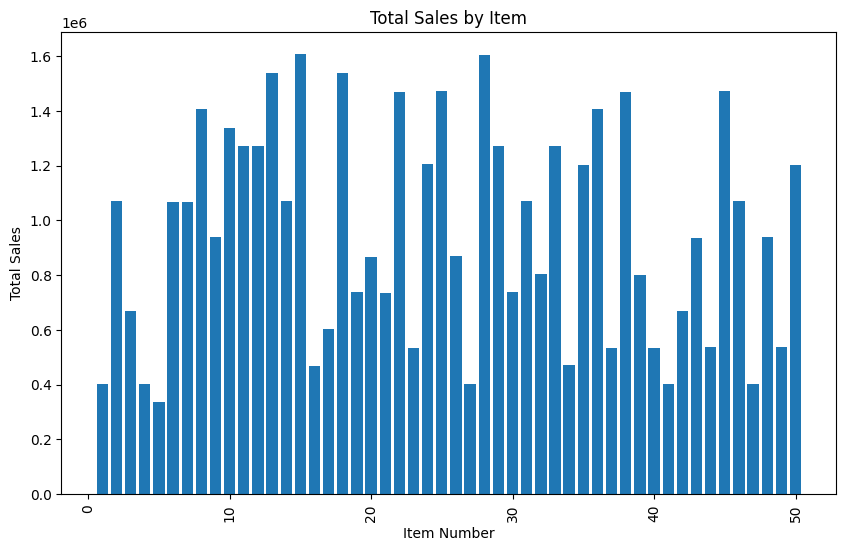

,sales
item,
15,1607442
28,1604713
13,1539621
18,1538876
25,1473334


In [ ]:
# Create a bar chart to show the sales group by item
# Group by item_nbr and calculate total sales for each item
item_sales = df_train.groupby('item')['sales'].sum()

# Sort item sales in descending order (highest to lowest)
item_sales_sorted = item_sales.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(item_sales_sorted.index, item_sales_sorted.values)
plt.xlabel('Item Number')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

item_sales_sorted.head(5)

The item no. 10 has the highest sales.

In [ ]:
#try pivot table to show average of each item sales in each store
AvgSalestable = pd.pivot_table(df_train, values='sales', index=['item'], columns=['store'], aggfunc=np.mean)
display(AvgSalestable.head(10))

<ipython-input-122-adee5a60ad84>:2: FutureWarning: The provided callable <function mean at 0x798096b1c280> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  AvgSalestable = pd.pivot_table(df_train, values='sales', index=['item'], columns=['store'], aggfunc=np.mean)


store,1,2,3,4,5,6,7,8,9,10
item,,,,,,,,,,
1,19.971522,28.173604,25.070099,22.938664,16.739321,16.717963,15.159365,26.983571,23.325849,24.736035
2,53.148959,75.316539,66.804491,61.715225,44.488499,44.533954,40.717963,71.656627,61.792442,65.566813
3,33.208105,46.992333,41.771084,38.548193,27.835706,27.811062,25.531216,45.076123,38.535049,41.113363
4,19.956188,28.234940,25.116101,23.086528,16.776561,16.754107,15.358160,26.948521,23.150055,24.721249
5,16.612815,23.540526,20.857612,19.525192,14.086528,13.893209,12.733844,22.427711,19.272180,20.637459
6,53.060789,74.945235,67.007119,61.270537,44.564622,44.503834,40.703724,71.958379,61.412377,65.612267
7,52.783680,75.058598,66.647864,61.625411,44.535597,44.599124,40.709748,71.730559,61.812158,65.807777
8,69.472070,99.090361,87.517525,80.819825,58.565717,58.385542,53.723987,94.461117,81.287514,86.176889
9,46.504929,65.478094,58.486857,54.043812,38.837349,39.460022,35.901972,63.193319,54.105696,57.886637


In [ ]:
#Prepare the data
#try data from store 1 item 1, where x = date and y = sales. We want to predict the sales.
try_store = 1
try_item = 1
try_start_date = '2013-01-01'
try_end_date = '2017-12-31'

store1_x = df_train[(df_train['store'] == try_store) & (df_train['item'] == try_item) & (df_train['date'] >= try_start_date) & (df_train['date'] <= try_end_date)]['date']
store1_y = df_train[(df_train['store'] == try_store) & (df_train['item'] == try_item) & (df_train['date'] >= try_start_date) & (df_train['date'] <= try_end_date)]['sales']
print(store1_x)
print(store1_y)

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
1821   2017-12-27
1822   2017-12-28
1823   2017-12-29
1824   2017-12-30
1825   2017-12-31
Name: date, Length: 1826, dtype: datetime64[ns]
0       13
1       11
2       14
3       13
4       10
        ..
1821    14
1822    19
1823    15
1824    27
1825    23
Name: sales, Length: 1826, dtype: int64


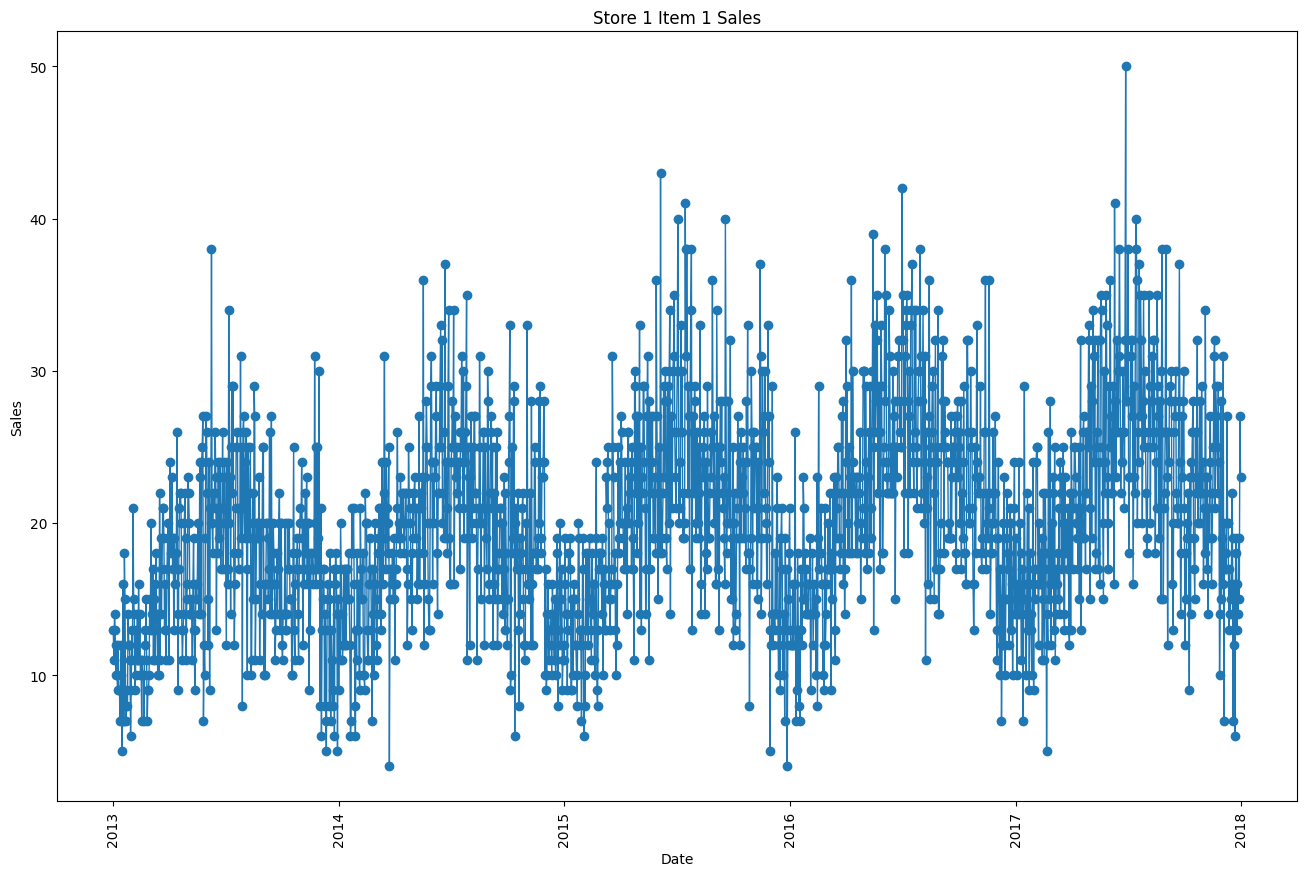

In [ ]:
#Visualize the data

xtickslen = 90

#plot the select value, where x is date and y is sales.
plt.scatter(store1_x, store1_y)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title(f'Store {try_store} Item {try_item} Sales')
plt.xticks(rotation=90)
#set size of plot to 1600×900
plt.gcf().set_size_inches(1600/100, 1000/100)
#fill in the line between the scatter plot
plt.plot(store1_x, store1_y, linewidth=1)
plt.show()

The scatter chart shows the trend of sales that increases over the year and there are some seasonal trend occurs yearly.

#SARIMA
First ML to apply on this dataset I choose SARIMA

source: https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/

You can start running the code from here.

In [ ]:
#Import the essential library first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import the .csv files and prepare the file
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape) #it should be (91300,4)
print(df_test.shape) #it should be (45000, 4)

(913000, 4)
(45000, 4)


In [ ]:
#Step 1 import libraries for SARIMA
#Import the nescessary libraries for SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#Step 2 Prepare the dataset
#select data from store 1 item 1
selected_store = 1
selected_item = 1
selected_start_date = '2013-01-01'
selected_end_date = '2017-12-31'

#use the date as input and sale as output
selected_store_date = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_start_date) & (df_train['date'] <= selected_end_date)]['date']
selected_store_sales = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_start_date) & (df_train['date'] <= selected_end_date)]['sales']

#preview of the data, uncomment to see
#print(selected_store_date)
#print(selected_store_sales)

#create sales_data as dataframe from selected_store_date and selected_store_sales
sales_data = {'date': selected_store_date, 'sales': selected_store_sales}
#convert into pandas's dataframe
sales_data=pd.DataFrame(sales_data)
#correcte the date into datetime type
sales_data['date']=pd.to_datetime(sales_data['date'])

In [ ]:
#Step 3: Extracting monthly sales
#Let’s extract monthly sales first
dfresample1 = sales_data.set_index('date')

#get the mean of each month sales
mean_sales = dfresample1.resample('M').mean()

#resample from the mean of each week sales
#dfresample2 = sales_data.set_index('date')
#weekly_sales = dfresample2.resample('W').mean()
#mean_sales = weekly_sales

#see the preview to monthly_sales
mean_sales.head()


<ipython-input-8-795ccef2862e>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mean_sales = dfresample1.resample('M').mean()


,sales
date,
2013-01-31,10.580645
2013-02-28,11.500000
2013-03-31,15.387097
2013-04-30,17.400000
2013-05-31,17.129032


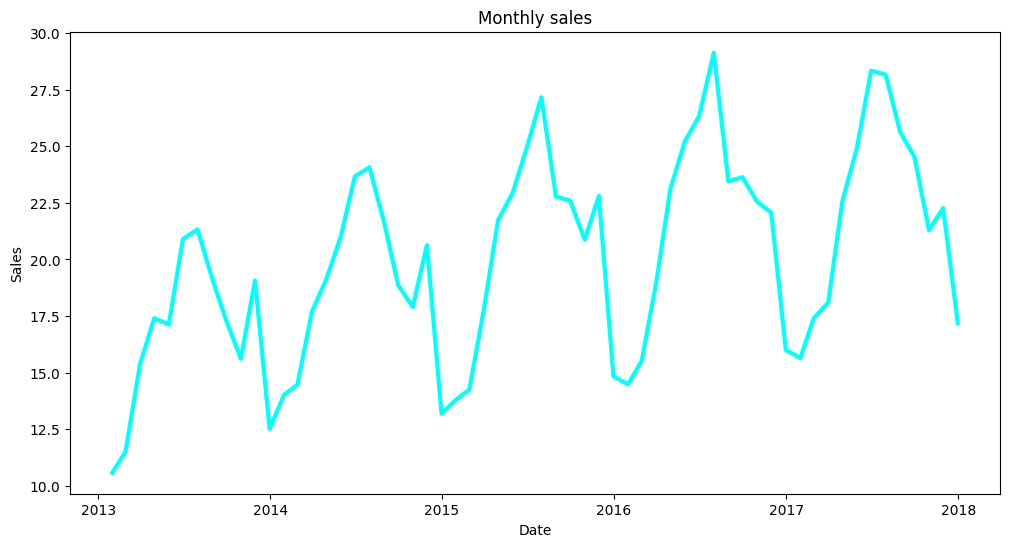

In [ ]:
#Step 4 Quickplot of monthly sales
plt.figure(figsize=(12, 6))
plt.plot(mean_sales['sales'], linewidth=3,c='cyan')
plt.title("Monthly sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

Step 5-6: Check Stationarity
Before applying SARIMA, check if the time series data is stationary because SARIMA assumes that the time series data is stationary. Stationarity refers to the ***statistical properties of a time series remaining constant over time***, such as **constant mean**, **constant variance**, and **constant autocovariance**. Here, I use the Dickey-Fuller test for this.

Perform the ADF Test: Inside the function, it calls the adfuller function on the timeseries. The autolag=’AIC’ parameter specifies that the lag order should be chosen based on the Akaike Information Criterion (AIC).
Retrieve the p-Value: It extracts the p-value from the ADF test result, which is stored in the variable p_value.
Print the Results: It prints the ADF Statistic (result[0]), the p-value (p_value), and a statement indicating whether the time series is stationary or non-stationary based on the p-value. If the p-value is less than 0.05, it considers the series as “Stationary”; otherwise, it’s labeled as “Non-Stationary.”
Check Stationarity of sales: The function is then called with the sales time series data, which is assumed to be the monthly sales data.

source of the function from https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/

In [ ]:
#check the stationary
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(mean_sales['sales'])

ADF Statistic: -4.051321644240131
p-value: 0.0011643777601816837
Stationary


In [ ]:
#full ADF test results
adfuller(mean_sales['sales'], autolag='AIC')

(-4.051321644240131,
 0.0011643777601816837,
 11,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 153.6693045695967)

Step 7 Identify Model Parameters

Identify the SARIMA model parameters (p, d, q, P, D, Q, s) using ACF and PACF plots.

- **ACF Plot**: This function generates an ACF plot, which is a plot of **autocorrelations** of the differenced time series. Autocorrelation measures the **relationship** between **a data point and previous data points at different lags**.
- **PACF Plot**: This function generates a PACF plot, which is a plot of **partial autocorrelations** of the differenced time series. Partial autocorrelation represents the correlation between **a data point and a lag while adjusting for the influence of other lags**.

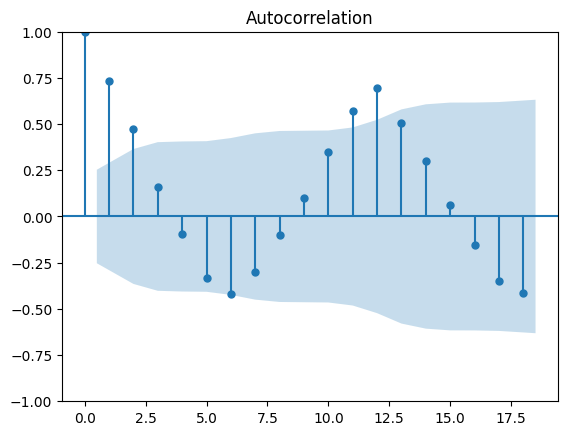

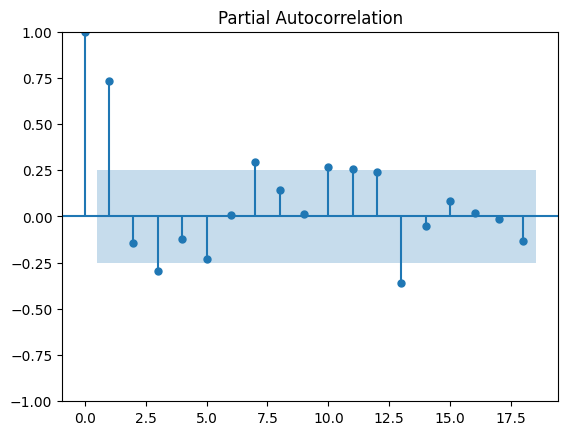

In [ ]:
#Fro above results our dataset is stationary

#Step 7 Identify Model Parameters
#Identify the SARIMA model parameters (p, d, q, P, D, Q, s) using ACF and PACF plots.
plot_acf(mean_sales)
plot_pacf(mean_sales)
plt.show()

Here, both plots have a horizontal axis that shows the lags, and a vertical axis representing correlation coefficients ranging from -1 to 1 where -1 means perfect negative correlation, 0 means no correlation and 1 means perfect positive correlation.

The blue shaded area represents confidence interval for the correlation coefficients. If the correlation coefficient at a certain lag is outside the confidence interval, it means that the correlation coefficient is statistically significant and not due to chance.

In [ ]:
#step 8 fit the SARIMA Model
# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(mean_sales, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [ ]:
#print results information
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -72.772
Date:                            Thu, 03 Oct 2024   AIC                            155.544
Time:                                    07:05:18   BIC                            164.795
Sample:                                01-31-2013   HQIC                           159.025
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0124      0.231     -0.054      0.957      -0.466       0.441
ma.L1         -0.6946      0.133   

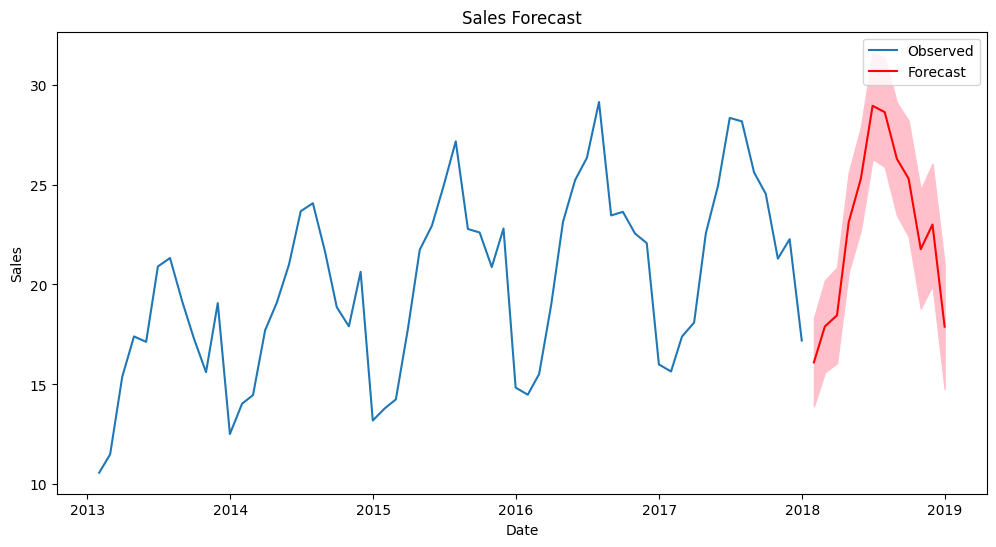

In [ ]:
#step 9 generate forcast

# Forecast future values
forecast_periods = 12  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(mean_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
observed = mean_sales[-forecast_periods:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 0.5523259169578969
MSE: 0.32295560448505667


Monthly sales predict
- MAE: 0.5523259169578969
- MSE: 0.32295560448505667

In [ ]:
#Questions for tomorrow (1 oct 2024)
#how to check performance of the model: I kinda got it: need to separate the test data to compare with prediction (3 Oct)
#how CV can help or other validation methods
#how to see the iterations
#how to adjust other parameters p,q,d,s I got it kinda (3 Oct)


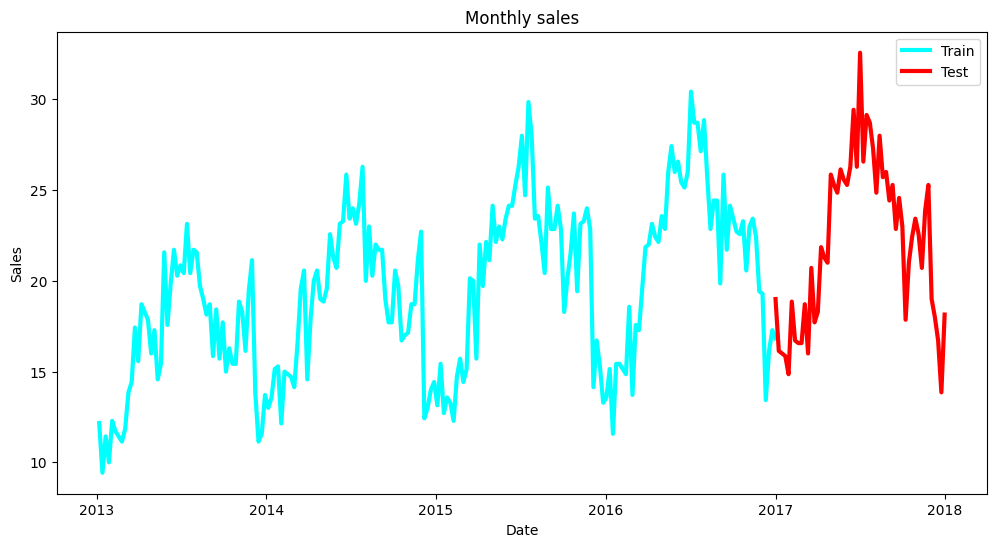

ADF Statistic: -2.8933144795360044
p-value: 0.0461309742884519
Stationary


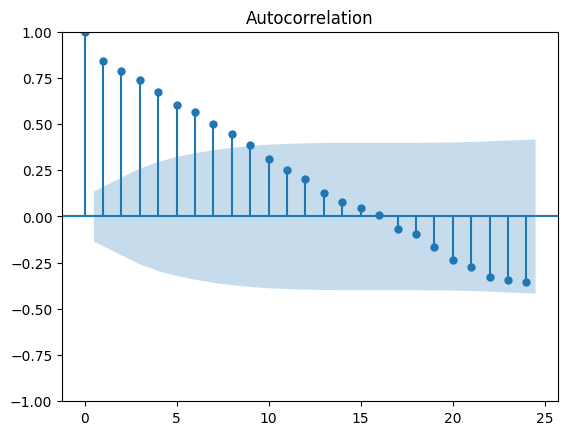

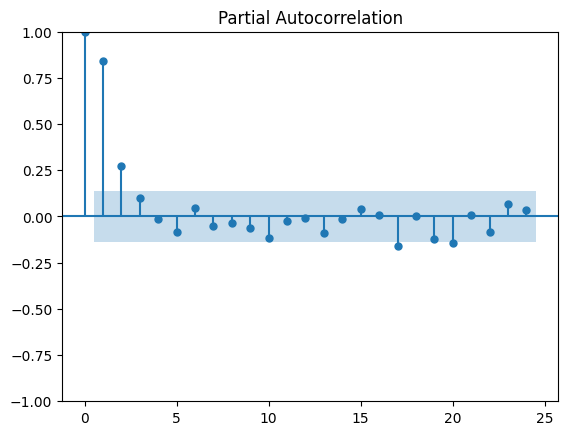

In [ ]:
#Do the model again with the weekly sales
#select data from store 1 item 1
selected_store = 1
selected_item = 1
selected_start_date = '2013-01-01'
selected_end_date = '2016-12-31'
selected_test_startdate = '2017-01-01'
selected_test_enddate = '2017-12-31'

#use the date as input and sale as output
selected_store_date = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_start_date) & (df_train['date'] <= selected_end_date)]['date']
selected_store_sales = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_start_date) & (df_train['date'] <= selected_end_date)]['sales']
selected_store_test_date = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_test_startdate) & (df_train['date'] <= selected_test_enddate)]['date']
selected_store_test_sales = df_train[(df_train['store'] == selected_store) & (df_train['item'] == selected_item) & (df_train['date'] >= selected_test_startdate) & (df_train['date'] <= selected_test_enddate)]['sales']

#preview of the data, uncomment to see
#print(selected_store_date)
#print(selected_store_sales)

#Train data--------------------------------------------
#create train_sales_data as dataframe from selected_store_date and selected_store_sales
train_sales_data = {'date': selected_store_date, 'sales': selected_store_sales}
#convert into pandas's dataframe
train_sales_data=pd.DataFrame(train_sales_data)
#correct the date into datetime type
train_sales_data['date']=pd.to_datetime(train_sales_data['date'])

#get weekly sales data for train
train_resample = train_sales_data.set_index('date')
weekly_sales = train_resample.resample('W').mean()

#Test data---------------------------------------------
test_sales_data = {'date': selected_store_test_date, 'sales': selected_store_test_sales}
#convert into pandas's dataframe
test_sales_data = pd.DataFrame(test_sales_data)
#correct the date into datetime type
test_sales_data['date']=pd.to_datetime(test_sales_data['date'])

#get weekly sales data for test
test_resample = test_sales_data.set_index('date')
test_weekly_sales = test_resample.resample('W').mean()

#plot to see the weekly data
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['sales'], linewidth=3,c='cyan', label='Train')
plt.plot(test_weekly_sales['sales'],linewidth=3,c='red',label='Test')
plt.title("Monthly sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

#check stationarity
check_stationarity(weekly_sales['sales'])

#see the ACF and PACF plot
plot_acf(weekly_sales)
plot_pacf(weekly_sales)
plt.show()

In [ ]:
#sarima model train
#assign parameters
p, d, q = 2, 2, 2
P, D, Q, s = 1, 1, 1, 52  # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(weekly_sales, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

#print results information
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                sales   No. Observations:                  209
Model:             SARIMAX(2, 2, 2)x(1, 1, [1], 52)   Log Likelihood                -342.337
Date:                              Thu, 03 Oct 2024   AIC                            698.673
Time:                                      11:16:14   BIC                            719.977
Sample:                                  01-06-2013   HQIC                           707.327
                                       - 01-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0380      0.118     -0.323      0.747      -0.269       0.193
ar.L2         -0.06

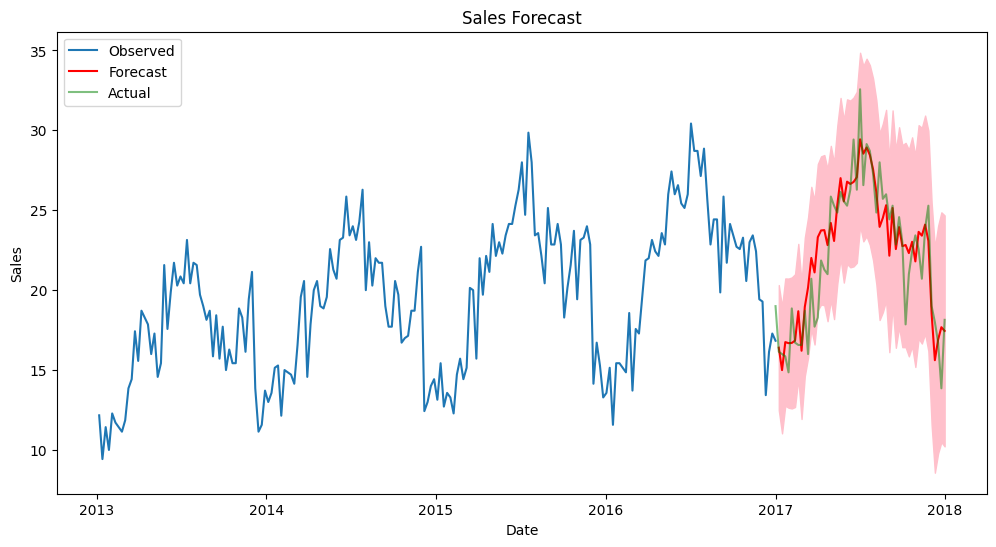

MAE: 1.5096296436379435
MSE: 3.947497468087074


In [ ]:
# Forecast future values
forecast_periods = (52)  # Forecast the next 12 weeks ~ 3 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
#get ste from forecast
forecast_ste = forecast.se_mean

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.plot(test_weekly_sales, label='Actual', color='green', alpha=0.5)
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='upper left')
plt.show()


#evaluate the prediction
observed = test_weekly_sales[-forecast_periods:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

Experimental parameters of SARIMA and the results
p, d, q = 1, 1, 1\
P, D, Q, s = 1, 1, 1, 52\
MAE: 1.3094044632895991\
MSE: 2.77290883147211

p, d, q = 2, 1, 2\
P, D, Q, s = 1, 1, 1, 52\
MAE: 1.295179155662829\
MSE: 2.7236087055574005

p, d, q = 2, 0, 2\
P, D, Q, s = 1, 1, 1, 52\
MAE: 1.1304429186063827\
MSE: 2.171889851465659

**This is the best one so far**\
p, d, q = 2, 2, 2\
P, D, Q, s = 1, 1, 1, 52\
MAE: 1.1168378256641918\
MSE: 2.091179203733461

Higher errors:

p, d, q = 2, 1, 2\
P, D, Q, s = 1, 0, 1, 52\
MAE: 1.440485314551425\
MSE: 3.297215957351691

p, d, q = 2, 1, 5\
P, D, Q, s = 1, 1, 1, 52\
MAE: 1.5317188463799345\
MSE: 3.921459090730578

p, d, q = 3, 1, 9\
P, D, Q, s = 2, 1, 2, 52\
MAE: 1.918343112983573\
MSE: 5.154341885839747

p, d, q = 2, 0, 2\
P, D, Q, s = 1, 0, 1, 52\
MAE: 1.9419836053484179\
MSE: 5.230146069130307

In [ ]:
#evaluate the prediction
observed = test_weekly_sales[-forecast_periods:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
rmse = np.sqrt(mse)
listobserved=list(observed['sales'])
mape = np.mean(np.abs((listobserved - forecast_mean) / listobserved)) * 100

#SD of error
error = forecast_mean - observed['sales']
sd_error = np.std(error)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')
print(f'SD of error: {sd_error}')

MAE: 1.5096296436379435
MSE: 3.947497468087074
RMSE: 1.9868310114569567
MAPE: 7.3593808134253615%
SD of error: 1.9583896888778751
